## Quantifying Centone Content in Arab Andalusian Music using TF-IDF
March - 2019

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import json

In [16]:
import sys
sys.path.append('../src/')
sys.path.append('..')

import extraction
import itertools
import model
import persistence
import reporting

In [17]:
from collections import Counter
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import music21

### Load

Load mappings Nawba mappings and recording metadata

In [18]:
data_path = '../data/'

In [19]:
# Nawba Mappings to centones
nawba_centones = persistence.load_and_parse_centones_mapping(os.path.join(data_path, 'Centones_Nawba.csv'))
# Nawba Mappings to tabs
nawba_tabs = persistence.load_and_parse_nawba_tabs(os.path.join(data_path, 'nawba_tabs.json'))

# Tab: list of centones
with open('../data/centones_tab.json') as f:
    centones_tab = json.load(f)
    
# Recording Descriptions
andalusian_description =  pd.read_json(os.path.join(data_path, 'andalusian_description.json'))

In [20]:
# Remove Spaces
centones_tab = {k:[i.replace(' ','') for i in v] for k,v in centones_tab.items()}

# Remove Duplicates
centones_tab = {k:list(set(v)) for k,v in centones_tab.items()}

In [21]:
scores = ['0b671737-40b7-4dd3-9baf-d7c9cded139f', '0d0f31a6-dbf6-4aee-868e-76a6be2ffab3', '0d1d3cff-e68e-403d-bb3f-caca302bf5ab', '0fb722f6-35a3-436b-9316-4c2de2b86cc7', '1ab3fe6b-0f46-4584-9abc-733d59c25c1b', '01da143e-4224-4692-8e6c-1d55f6de8a6d', '1f623914-8002-4866-8a6e-4dc684e848d9', '1ffa4dee-b08e-4332-a2ab-9843c13c3dfa', '02b76946-deec-48cf-9007-770c37b6c3cc', '2bf90ba7-210f-4210-b986-dbf57edcf861', '2c44caec-ea8c-474b-9dda-c55c660df969', '2cf367de-583b-4bd6-83f3-fc036fe19fab', '2d8e2820-e4cf-4dc8-b4f1-45f8fb65de9e', '2d91d7e4-904a-46b7-bce2-230ca4e1b1c4', '2d2683c4-4b3e-4430-a254-c828427bdcc7', '3a578e21-46bb-47f2-9a4d-7cd738f0dd5b', '3b0fcedc-b11c-4665-9ae1-c23292f986be', '3b8d2e45-3bfd-4596-bcc0-addc64551eda', '3bb348f5-417d-4646-9041-42b935c54c28', '3e5a82a2-d806-45cc-876e-6fa8a2b5a61d', '03e555c6-a480-4e11-aef7-231891c4f4e6', '3e39495a-443d-483d-93d7-cdf96248c374', '3fb6107c-13be-4006-851a-a857ed2f80bb', '4a90d304-5deb-4af9-83d6-15931c289b73', '4a290e8e-26ca-4cd9-992e-b6f96291f111', '04b42450-8838-4a20-9e79-d42f03f8cc51', '4bb0c111-8864-488a-a1e9-49f504c36312', '4cfc03f4-9378-41d3-acd5-87b09c68d46b', '4ddff7dd-8916-4dc4-abdd-56ce12ea88ca', '5a5432e8-efff-4010-88cc-1ad921cc2075', '5eb3c226-d289-40fe-a9f4-697568eb37d5', '6aa540dc-e857-4115-9b90-a0480eb5316f', '6fe7108c-4e4f-457b-a363-ccf505bdee9a', '7a5cc189-4962-42d0-8141-d1374e933e46', '7a6e069b-a84c-4848-b1d4-b4ac8f76d414', '7e3ee6f2-c42f-4da4-9816-45aadcffea88', '07ee1daa-3bac-4bb8-922e-36729c11fc3a', '8a7aa258-312b-4bfb-8b00-a58c925ceae2', '8bd4a00f-e9f7-4a54-adc1-89c8356154e4', '8d2c6cc3-5aac-48b0-a335-aa0ddf77f0b6', '8ddaae6b-3657-41f1-98a1-7faffd6dcb5f', '8f32c379-c70a-4e9e-aabb-e0735611ecab', '9b95a239-54c8-4cbe-b063-793b8718f022', '9b194c42-f974-42f8-89b1-123bb07170b8', '9b546274-eea6-459f-a0c2-918f0997fa2b', '9c48f778-ccb8-4a08-969c-68e250798035', '12ce112f-38ed-4700-94ec-a329d06f6196', '13a8d4b9-8dbf-40c0-98df-db64791e43a9', '17d9c6c3-af43-4975-8a38-606077b1ff80', '18c76000-5e12-4b04-8151-6c425c5fac21', '023b4a37-1ab4-4593-b03a-850ee0db8350', '25dde40c-24c8-4411-8e2d-e4c1990917df', '47a41543-89c7-40ad-a665-f7460ad4e4de', '47e023e5-62a3-4dec-b61a-128ca5e23982', '56da9cc8-dbdf-4123-9f05-d866b8380d93', '59fcb1d1-61f4-4cdc-9f7f-56757bf2400e', '61aa5ef4-a4bd-4bcd-8301-1d2605db6279', '62acb9e5-e311-40ab-9c5c-866d071b5c93', '64eb6302-34ec-4434-a004-4e7e503c3e6c', '69ac4f1a-eca5-42eb-9f9c-a1c2316cb040', '70c04adf-b886-4d62-a88a-abdde5d93715', '73c4fd81-7464-4771-bd90-e3038dd633ef', '75c19222-829c-4317-bbb5-5627d4802b28', '80dfbf12-1532-48e8-8128-1132acfca376', '80e8e9d5-c0ee-4d24-9418-f098b7110ca7', '91d6a3f1-07c3-49b2-bcea-7d6c378e73cd', '92de6fc8-a040-4500-bd94-73e9ee39f189', '095b5074-e93e-40a9-93a4-d90b48feda79', '99c711e8-0683-4a44-9116-fc2b9448d98d', '224bfb11-f761-4976-bc71-42d9805e5d63', '263f2386-1081-4307-b686-1c99c2f31fa1', '277bc427-16dd-4468-9f4c-16945ffc3b30', '0386e377-7212-43e5-89b6-7f4c42d0ae74', '545dd98f-9667-4299-b967-71e0a2a3c883', '689a2401-00b8-44f5-8107-76bfe75a36fe', '719a2afc-461f-461e-ad18-8bce2c4f5023', '761e7fe4-871a-4f3e-8128-1cd1885d5288', '769ff214-27f4-4ac1-8750-a03015d51161', '799b1ba0-46ec-4d0d-bdff-e07d1dc07b09', '809e1d64-659c-4ef5-93ea-3d752eae25eb', '860a5ee6-6f83-42b1-a277-8ebad8d15b37', '0909c62d-7eb7-4976-b125-c20c12cc15a1', '1630e9c2-3c01-4959-a633-7dbacbc7616e', '4644f251-c85c-47a4-a1a7-1ca264d3c5d8', '6021ce1e-7117-45de-8e49-71f94b0572af', '6311c0de-d66f-482d-8dd1-8d8917ca6a76', '7448d9c2-5261-4e70-bd98-6ed8416f908f', '8842c1f0-e261-4069-bd59-768bb9a3315c', '9727ddbe-eb79-461b-9861-8a60336b17f6', '9781e524-92de-43f2-87e3-1e9f05931f0e', '35585cf5-36df-4592-bbf8-f7f2d6c7632c', '52152ffb-5447-45dc-a332-2fdda533380e', '679856bc-132f-4982-b04e-cbf6b5b1129b', '2083676f-c26b-4e2e-8324-1b571e729521', '4342021d-03a1-4727-8c0f-3c23180ef374', '8361317d-2b4e-438f-9b73-d1daaa200a3e', '25857838-1a8a-4102-a818-88bca8be5cf6', '33423585-e406-40ec-ba28-88b0768cb668', '36822512-b1c8-42aa-9e55-fe9d10560371', '44183247-4857-40cd-82bc-b4e9e3f458f1', '64998568-2c8f-41f2-8462-5a9c798b6055', '78593333-603a-4abe-9c9b-6c4db3abc61e', '95940501-39f3-4c08-9bbb-1799d8d89a45', '97223154-d5c2-4c37-8e6c-4c998056a674', '99004770-1152-4fec-802a-a0014e9b9930', 'a0f4157f-faa1-4304-ac75-b612587fb221', 'a1eac726-208e-4c24-bd57-e34e9e93dcd3', 'a025eef0-d130-496f-9581-f5ce40bd1783', 'a451a7fc-c53f-462a-b3fc-4377bb588105', 'a4051c3a-71a5-436b-a5c7-9cf6c1410b78', 'a0245446-e4eb-40f4-bc43-6daa190eb97d', 'aecf65c2-ef6a-4e7a-a123-24fbe757684e', 'b1defca8-81a5-4b88-8dea-6c99b3bf04b8', 'b3d92934-0946-4f2d-8183-312450d7e45e', 'b7b63bb4-1839-45bf-bb4f-389f150c556a', 'b018d0fd-9955-47bb-9ef2-d291f500eebe', 'b787f4e2-dce1-4bfe-89b3-193cbaa5c90d', 'b8327bca-28eb-402b-9184-7777b980048c', 'b11237b9-d45b-4b3a-a97b-ab7d198f927f', 'b485548d-6b46-48aa-835f-1326f06bb91f', 'b3059282-a235-4fa4-9093-cb16a70d4b5d', 'b6091182-8877-4918-b637-77987c4a1034', 'bb7adfee-f63d-4004-a457-b31ae784a0bd', 'bb44fb69-f787-4729-8470-1955eadb4862', 'bc6ad194-8116-49e2-ae02-903264ca7fe1', 'bc9625f1-cee7-432f-9f8d-dc9881a47dc2', 'be5245ab-738a-4a93-a566-e73ced9d09da', 'c1e0311e-ee21-470c-b6f9-815d892cf6c9', 'c20e4852-d140-4909-acab-e850c0e7d8e8', 'c462ca37-7812-4b9b-9865-275da1f237fe', 'c2560f5e-e040-40ca-a390-72ed1ecd0792', 'c8029ba7-5827-4628-b0bd-1adcc1bb8379', 'cb85269e-ab6c-4226-aea1-8226be1fe86c', 'ccbfa79b-5ca4-4719-9f6b-04076180642e', 'cdf77450-2d12-472d-9f6d-c150bba808b8', 'd4cadf34-1074-44ce-9928-f438198d5d6d', 'd5cc773e-9d31-42e8-b9de-91374fe7153b', 'd28dda8b-a4be-46a1-8845-b82d73937b41', 'd66d44e9-f722-4b23-8753-0dea2818f475', 'd80d7c9c-3be1-4309-8520-12ac542a6759', 'd2830817-7b06-4f98-bba5-daf8ae9f85be', 'dae13b1f-b7fd-4db3-af3c-11784d51d829', 'db529ac1-4b46-4c7b-bf6a-28f152bf19fb', 'e0ce0420-165c-4339-8556-6d75a0b733c7', 'e4e3fc3c-8d57-4123-b14c-236110dde3c0', 'e79c1615-7172-43a4-acdf-e9475c224edf', 'e3003cd0-430a-4481-a33d-c15c22da2404', 'e22549ae-4a0c-43ef-87f4-e0f81ed49d58', 'ec5d2ba0-7c04-4d87-83b9-f82d363ca319', 'ec15c3e3-f58b-4073-8e1e-82620f488745', 'ee64a602-ace5-4e1a-96ef-89a7cf41cfb5', 'eefa9d7d-6172-4c90-ba0c-ef9a41faa95d', 'f7bcb9af-6abb-4192-ae3d-37fa811034ce', 'f7c00e6e-7b07-47ba-bfdd-146ddbf9adb5', 'f8b75f4a-1524-43cb-ad45-622ac277d96e', 'f461045b-50bc-4b20-a731-66fbd3a264ae', 'fac4011e-c8f4-4a34-b02c-91ef429803cf', 'fb387964-4764-4900-91b5-f2ea7e10b786']
# scores with chords
scores = [s for s in scores if s != '0386e377-7212-43e5-89b6-7f4c42d0ae74']

In [ ]:
set_tabs

### Pattern Extraction

Load all scores into a stream of notes

In [22]:
def pattern_stream_from_score(path, rest_quarter_length=0):
    """
    Load a score from <path> and return an ordered list of notes
    R represents a rest greater than or equal to <rest_quarter_length>
    ...rests shorter than <rest_quarter_length> are ignored

    Fails if score contains chords
    """

    s = music21.converter.parse(path)
    p = s.parts[0]

    # These are all the notes of the whole piece, fails for chords
    notes_and_rests = p.flat.notesAndRests.stream()
    notes = []
    for n in notes_and_rests:
        if n.isRest:
            if n.duration.quarterLength > rest_quarter_length:
                note = 'R'
            octave = ''
        else:
            note = str(n.pitch.name)
            octave = str(n.pitch.octave)
        duration = n.duration.quarterLength
        notes.append((note, octave, duration))
    return notes

In [23]:
patterns = []
for s in scores:
    row = andalusian_description[andalusian_description['mbid']==s]
    tab = row['sections'].values[0][0]['tab']['transliterated_name']
    name = row['transliterated_title'].values[0]
    if tab in centones_tab:
        nawba = nawba_tabs[tab]
        try:
            notes = pattern_stream_from_score("../data/scores/{score}.xml".format(score=s))
            d = {
                'name':name,
                'tab':tab,
                'nawba': nawba,
                'notes': notes
            }
            patterns.append(d)
        except:
            continue

##### Write SPMF format

In [27]:
def get_line(p):
    name = unidecode.unidecode(p['name'].replace(' ','').replace('\t','')).replace("'","").replace("-","_")
    tab = unidecode.unidecode(p['tab'].replace(' ','').replace('\t','')).replace("'","").replace("-","_")
    notes = p['notes']
    
    f = []
    for n,o,d in notes:
        if n =='R':
            f.append('base:{n}\tdur:{d}\t-1\t'.format(n=n, d=d))
        else:
            f.append('base:{n}\toctave:{o}\tdur:{d}\t-1\t'.format(n=n, o=o, d=d))
            
    features = ''.join(f)
    string = '{name}\t{tab}\t{features}-2\n'.format(name=name, tab=tab, features=features)
    return string

In [56]:
with open('arab_andalusian_ascii_20201018.txt', 'a') as f:
    f.writelines([get_line(p) for p in patterns])
    f.close()

In [28]:
tabs = [p['tab'] for p in patterns]
set_tabs = set(tabs)
tab_num_scores = Counter(tabs)

Extract bag of patterns from each score

In [31]:
def get_bop(patterns, min_n=3, max_n=10):
    notes = [[y[0] for y in x['notes']] for x in patterns]
    extracted = [extraction.extract_pattern_grams(nt, min_n=3, max_n=10) for nt in notes]
    return extracted

In [32]:
extracted = get_bop(patterns, min_n=3, max_n=7)

###### For each tab, how many scores and what are the centones?

In [33]:
for t in set_tabs:
    i_s = [i for i,x in enumerate(patterns) if x['tab']==t]

    print(t)
    print('num scores: '+str(len(i_s)))
    print('')
    for c in centones_tab[t]:
        tab_patterns = []
        for i in i_s:
            tab_patterns = tab_patterns + extracted[i].split(' ')

        n = len([x for x in tab_patterns if x == c])
        print(c)
    print('\n\n')

al-ḥiŷāz al-mašriqī
num scores: 5

EF#G
AGF#E-D
CBAG



al-ṣīka
num scores: 1

EFG
FED
EFDE
EDC
AGFE
CDE



raml al-māya
num scores: 19

FEDC
EFG
FED
B-AG
B-AGF
BAG
CBAG
FDECD
FAG
FGA



al-ḥiŷāz al-kabīr
num scores: 10

CED
F#GA
AGF#E-D
FED
CBAG



al-istihlāl
num scores: 23

FEDC
EFG
GFE
CBAG
FAG
ABC



‘irāq al-‘aŷam
num scores: 7

EF#G
GF#ED
FED
AGB
BAG
EDC
CDE



raṣd al-ḏāyl
num scores: 16

EDC
AGC
AGFE
B-AG
CDE



al-iṣbahān
num scores: 13

FEDC
EFG
FED
GFE
FEFGD
CBAG
AGFE
BCD



garībat al-ḥusayn
num scores: 12

CBA
FED
AGF
EFDE
AGFE
CDE



al-raṣd
num scores: 10

AGE
F#GA
CED
EDC
CDE



al-‘uššāq
num scores: 7

CED
BAG
FED
CBAG
EDG



al-mašriquī
num scores: 10

FEDC
FGA
FED
CDF
AGF



al-māya
num scores: 12

EFG
B-AG
CBAG
FGEFEDC
AGFE
BDC
GABC





### TFIDF

Apply TF-IDF on corpus of bag of patterns

In [34]:
distributions = model.get_tfidf_distributions(extracted)

Average tf-idf for each pattern for each Nawba

In [35]:
def average_tfidf(distributions, tabs):
    set_tabs = list(set(tabs))
    tab_num_scores = Counter(tabs)
    index_tab = dict(enumerate(set_tabs))
    tab_index = {v:k for k,v in index_tab.items()}
    all_tabs_index = [tab_index[t] for t in tabs]
    frame_grouped = model.average_tfidf(distributions, tabs)
    return frame_grouped

In [36]:
frame_grouped = average_tfidf(distributions, tabs)

### Results

Plot analysis results

In [20]:
# Initialise Nawba number to plot
i = 1

Repeatedly run these cells to iterate through all Nawbas

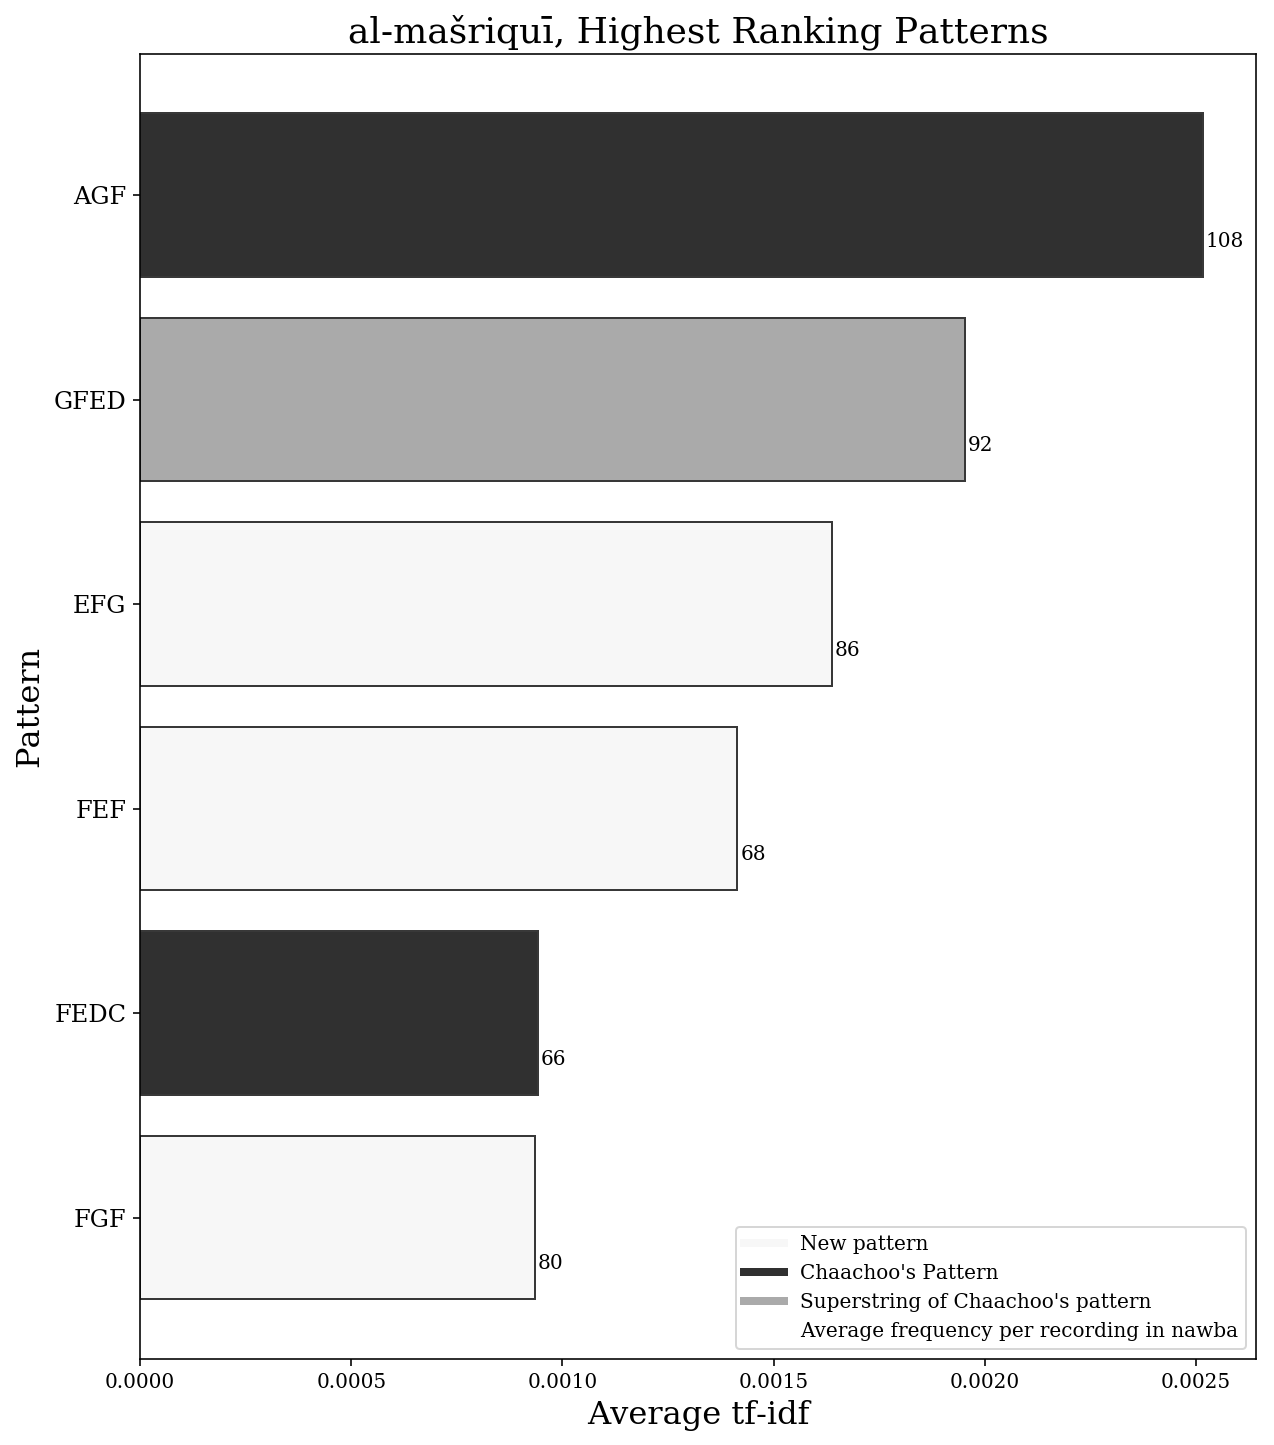

In [21]:
# Bars marked black match amins centones
# Bars marked grey are supersets of amins centones
# Bars marked white are un-defined centones
tab = list(set_tabs)[i]
final_patterns = reporting.get_top_centones_plot(frame_grouped, tab, centones_tab, tab_num_scores[tab], min_freq=66, exclude_monopattern=False)
i += 1
if i > len(set(nawba_centones.keys())):
    i = 1

### Evaluation

In [286]:
our_patterns = reporting.get_all_patterns(set_tabs, frame_grouped, tab_num_scores, min_freq=66, exclude_monopattern=True, prefer_superstrings=False)
results_dict = reporting.get_recalls(our_patterns, centones_tab, set_tabs)

/Users/tom/.pyenv/versions/3.5.1/lib/python3.5/site-packages/pandas/core/frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Recall Scores
-------------
al-‘uššāq: 0.4 (2/5)
‘irāq al-‘aŷam: 0.5714285714285714 (4/7)
raml al-māya: 0.4 (4/10)
al-māya: 0.42857142857142855 (3/7)
raṣd al-ḏāyl: 0.6 (3/5)
al-ṣīka: 0.16666666666666666 (1/6)
al-iṣbahān: 0.75 (6/8)
garībat al-ḥusayn: 0.6666666666666666 (4/6)
al-istihlāl: 0.8333333333333334 (5/6)
al-raṣd: 0.8 (4/5)
al-mašriquī: 0.6 (3/5)
al-ḥiŷāz al-kabīr: 0.6 (3/5)
al-ḥiŷāz al-mašriqī: 0.0 (0/3)

Overall: 0.5384615384615384 (42/78)


#### Parameter Grid Search

In [282]:
tabs = [p['tab'] for p in patterns]
set_tabs = set(tabs)

# Get Bag of Patterns
extracted = get_bop(patterns, min_n=3, max_n=7)

# TF-IDF
distributions = model.get_tfidf_distributions(extracted)

# Average
frame_grouped = average_tfidf(distributions, tabs)

# Get Patterns
our_patterns = reporting.get_all_patterns(set_tabs, frame_grouped, tab_num_scores, min_freq=100, exclude_monopattern=True, prefer_superstrings=False)

/Users/tom/.pyenv/versions/3.5.1/lib/python3.5/site-packages/pandas/core/frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [58]:
def f1_score(p, r):
    return 2*p*r/(p + r) if p+r != 0 else np.nan

In [244]:
min_n = [3]
max_n = [7]
min_freq = range(20,150)
exclude_monopatterns = True

results_df_superstrings = pd.DataFrame(
    columns=['min_n','max_n','min_freq','recall','precision', 'num_patterns'])

for i,(min__n, max__n, min__freq) in enumerate(itertools.product(min_n, max_n, min_freq)):
    if max__n > min__n:
        print('i={i}, min_n={min_n}, max_n={max_n}, min_freq={min_freq}'.format(i=i, min_n=min__n, max_n=max__n, min_freq=min__freq))
        recall, precision, num_patterns = reporting.complete_pipeline(patterns, tab_num_scores, centones_tab, min_n=min__n, max_n=max__n, min_freq=min__freq, exclude_monopatterns=False, prefer_superstrings=False, match_superstrings=True)
        results_df_superstrings = results_df_superstrings.append(
            {'min_n': min__n,
             'max_n': max__n,
             'min_freq': min__freq,
             'recall': recall,
             'precision': precision,
             'num_patterns':num_patterns},
        ignore_index=True)
results_df_superstrings['f1'] = results_df_superstrings.apply(lambda y: f1_score(y.precision, y.recall),axis=1)
results_df_superstrings.to_csv('results_df_superstrings.csv', index=False)

i=0, min_n=3, max_n=7, min_freq=20


/Users/tom/.pyenv/versions/3.5.1/lib/python3.5/site-packages/pandas/core/frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


i=1, min_n=3, max_n=7, min_freq=21
i=2, min_n=3, max_n=7, min_freq=22
i=3, min_n=3, max_n=7, min_freq=23
i=4, min_n=3, max_n=7, min_freq=24
i=5, min_n=3, max_n=7, min_freq=25
i=6, min_n=3, max_n=7, min_freq=26
i=7, min_n=3, max_n=7, min_freq=27
i=8, min_n=3, max_n=7, min_freq=28
i=9, min_n=3, max_n=7, min_freq=29
i=10, min_n=3, max_n=7, min_freq=30
i=11, min_n=3, max_n=7, min_freq=31
i=12, min_n=3, max_n=7, min_freq=32
i=13, min_n=3, max_n=7, min_freq=33
i=14, min_n=3, max_n=7, min_freq=34
i=15, min_n=3, max_n=7, min_freq=35
i=16, min_n=3, max_n=7, min_freq=36
i=17, min_n=3, max_n=7, min_freq=37
i=18, min_n=3, max_n=7, min_freq=38
i=19, min_n=3, max_n=7, min_freq=39
i=20, min_n=3, max_n=7, min_freq=40
i=21, min_n=3, max_n=7, min_freq=41
i=22, min_n=3, max_n=7, min_freq=42
i=23, min_n=3, max_n=7, min_freq=43
i=24, min_n=3, max_n=7, min_freq=44
i=25, min_n=3, max_n=7, min_freq=45
i=26, min_n=3, max_n=7, min_freq=46
i=27, min_n=3, max_n=7, min_freq=47
i=28, min_n=3, max_n=7, min_freq=48
i

In [23]:
tabs = [p['tab'] for p in patterns]
set_tabs = set(tabs)

# Get Bag of Patterns
extracted = reporting.get_bop(patterns, min_n=3, max_n=7)

# TF-IDF
distributions = model.get_tfidf_distributions(extracted)

# Average
frame_grouped = reporting.average_tfidf(distributions, tabs)

In [363]:
min_freq = [20]
threshs = np.arange(0, 0.07, 0.0001)

results_df_tfidf = pd.DataFrame(
    columns=['min_freq', 'tfidf_thresh','recall','precision', 'num_patterns_tab', 'num_patterns'])


for i, (mf, tf) in enumerate(itertools.product(min_freq, threshs)):
    print('i={i}, min_freq={min_freq}, thresh={tf}'.format(i=i, min_freq=mf, tf=tf))

    # Get Patterns
    our_patterns = reporting.get_all_patterns(set_tabs, frame_grouped, tab_num_scores, min_freq=mf, exclude_monopattern=True, prefer_superstrings=False, tfidf_thresh=tf)
    
    # Evaluate
    ct = {k:v for k,v in centones_tab.items() if k in set_tabs}
    set_tabs = {x for x in set_tabs if x in set_tabs}
    results_dict = reporting.get_recalls(our_patterns, ct, set_tabs, print_screen=False, match_superstrings=True)
    recall, precision = results_dict['overall']

    num_patterns = [len(x) for x in our_patterns.values()]
    
    results_df_tfidf = results_df_tfidf.append(
        {'min_freq': mf,
         'tfidf_thresh':tf,
         'recall': recall,
         'precision': precision,
         'num_patterns_tab':num_patterns,
         'num_patterns':sum(num_patterns)},
    ignore_index=True)
    
results_df_tfidf['f1'] = results_df_tfidf.apply(lambda y: f1_score(y.precision, y.recall), axis=1)
results_df_tfidf.to_csv('results_df_tfidf.csv', index=False)

i=0, min_freq=20, thresh=0.0


/Users/tom/.pyenv/versions/3.5.1/lib/python3.5/site-packages/pandas/core/frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


i=1, min_freq=20, thresh=0.0001
i=2, min_freq=20, thresh=0.0002
i=3, min_freq=20, thresh=0.00030000000000000003
i=4, min_freq=20, thresh=0.0004
i=5, min_freq=20, thresh=0.0005
i=6, min_freq=20, thresh=0.0006000000000000001
i=7, min_freq=20, thresh=0.0007
i=8, min_freq=20, thresh=0.0008
i=9, min_freq=20, thresh=0.0009000000000000001
i=10, min_freq=20, thresh=0.001
i=11, min_freq=20, thresh=0.0011
i=12, min_freq=20, thresh=0.0012000000000000001
i=13, min_freq=20, thresh=0.0013000000000000002
i=14, min_freq=20, thresh=0.0014
i=15, min_freq=20, thresh=0.0015
i=16, min_freq=20, thresh=0.0016
i=17, min_freq=20, thresh=0.0017000000000000001
i=18, min_freq=20, thresh=0.0018000000000000002
i=19, min_freq=20, thresh=0.0019
i=20, min_freq=20, thresh=0.002
i=21, min_freq=20, thresh=0.0021000000000000003
i=22, min_freq=20, thresh=0.0022
i=23, min_freq=20, thresh=0.0023
i=24, min_freq=20, thresh=0.0024000000000000002
i=25, min_freq=20, thresh=0.0025
i=26, min_freq=20, thresh=0.0026000000000000003
i=

i=217, min_freq=20, thresh=0.0217
i=218, min_freq=20, thresh=0.0218
i=219, min_freq=20, thresh=0.0219
i=220, min_freq=20, thresh=0.022000000000000002
i=221, min_freq=20, thresh=0.0221
i=222, min_freq=20, thresh=0.0222
i=223, min_freq=20, thresh=0.0223
i=224, min_freq=20, thresh=0.0224
i=225, min_freq=20, thresh=0.022500000000000003
i=226, min_freq=20, thresh=0.022600000000000002
i=227, min_freq=20, thresh=0.0227
i=228, min_freq=20, thresh=0.0228
i=229, min_freq=20, thresh=0.0229
i=230, min_freq=20, thresh=0.023
i=231, min_freq=20, thresh=0.023100000000000002
i=232, min_freq=20, thresh=0.023200000000000002
i=233, min_freq=20, thresh=0.0233
i=234, min_freq=20, thresh=0.0234
i=235, min_freq=20, thresh=0.0235
i=236, min_freq=20, thresh=0.0236
i=237, min_freq=20, thresh=0.023700000000000002
i=238, min_freq=20, thresh=0.0238
i=239, min_freq=20, thresh=0.0239
i=240, min_freq=20, thresh=0.024
i=241, min_freq=20, thresh=0.0241
i=242, min_freq=20, thresh=0.024200000000000003
i=243, min_freq=20, 

i=431, min_freq=20, thresh=0.0431
i=432, min_freq=20, thresh=0.0432
i=433, min_freq=20, thresh=0.043300000000000005
i=434, min_freq=20, thresh=0.0434
i=435, min_freq=20, thresh=0.043500000000000004
i=436, min_freq=20, thresh=0.0436
i=437, min_freq=20, thresh=0.0437
i=438, min_freq=20, thresh=0.0438
i=439, min_freq=20, thresh=0.0439
i=440, min_freq=20, thresh=0.044000000000000004
i=441, min_freq=20, thresh=0.0441
i=442, min_freq=20, thresh=0.0442
i=443, min_freq=20, thresh=0.0443
i=444, min_freq=20, thresh=0.0444
i=445, min_freq=20, thresh=0.044500000000000005
i=446, min_freq=20, thresh=0.0446
i=447, min_freq=20, thresh=0.044700000000000004
i=448, min_freq=20, thresh=0.0448
i=449, min_freq=20, thresh=0.0449
i=450, min_freq=20, thresh=0.045000000000000005
i=451, min_freq=20, thresh=0.0451
i=452, min_freq=20, thresh=0.045200000000000004
i=453, min_freq=20, thresh=0.0453
i=454, min_freq=20, thresh=0.0454
i=455, min_freq=20, thresh=0.0455
i=456, min_freq=20, thresh=0.0456
i=457, min_freq=20

i=643, min_freq=20, thresh=0.06430000000000001
i=644, min_freq=20, thresh=0.0644
i=645, min_freq=20, thresh=0.0645
i=646, min_freq=20, thresh=0.0646
i=647, min_freq=20, thresh=0.06470000000000001
i=648, min_freq=20, thresh=0.0648
i=649, min_freq=20, thresh=0.0649
i=650, min_freq=20, thresh=0.065
i=651, min_freq=20, thresh=0.0651
i=652, min_freq=20, thresh=0.06520000000000001
i=653, min_freq=20, thresh=0.0653
i=654, min_freq=20, thresh=0.0654
i=655, min_freq=20, thresh=0.0655
i=656, min_freq=20, thresh=0.0656
i=657, min_freq=20, thresh=0.06570000000000001
i=658, min_freq=20, thresh=0.0658
i=659, min_freq=20, thresh=0.0659
i=660, min_freq=20, thresh=0.066
i=661, min_freq=20, thresh=0.0661
i=662, min_freq=20, thresh=0.06620000000000001
i=663, min_freq=20, thresh=0.0663
i=664, min_freq=20, thresh=0.0664
i=665, min_freq=20, thresh=0.0665
i=666, min_freq=20, thresh=0.0666
i=667, min_freq=20, thresh=0.06670000000000001
i=668, min_freq=20, thresh=0.0668
i=669, min_freq=20, thresh=0.0669
i=670,

In [ ]:
results_df_min_freq['n_patterns'] = results_df_min_freq['num_patterns'].apply(lambda y: sum(y))

In [60]:
import matplotlib.pyplot as plt

In [61]:
results_df_min_freq = results_df_min_freq.loc[:,~results_df_min_freq.columns.duplicated()]

In [259]:
df = results_df_min_freq[
    (results_df_min_freq['tfidf_thresh']==0)].sort_values(by='min_freq', ascending=True)

In [339]:
def how_many_notes(p, note):
    notes = [x[0] for x in p['notes']]
    return len([x for x in notes if x == note])

## Parameter Tuning

**PRECISION** - What proportion of the patterns we predicted matched Amins

**RECALL** - What proportion of Amins patterns did we predict

**F1** - (2 x precision x recall)/(precision x recall) ["harmonic mean" of precision and recall]

### Selecting Minimum Frequency

With no tf idf threshold we vary minimum frequency and record performance

In [288]:
df = results_df_min_freq[
    (results_df_min_freq['tfidf_thresh']==0.00)].sort_values(by='min_freq', ascending=True)

Text(0,0.5,'Number of Patterns')

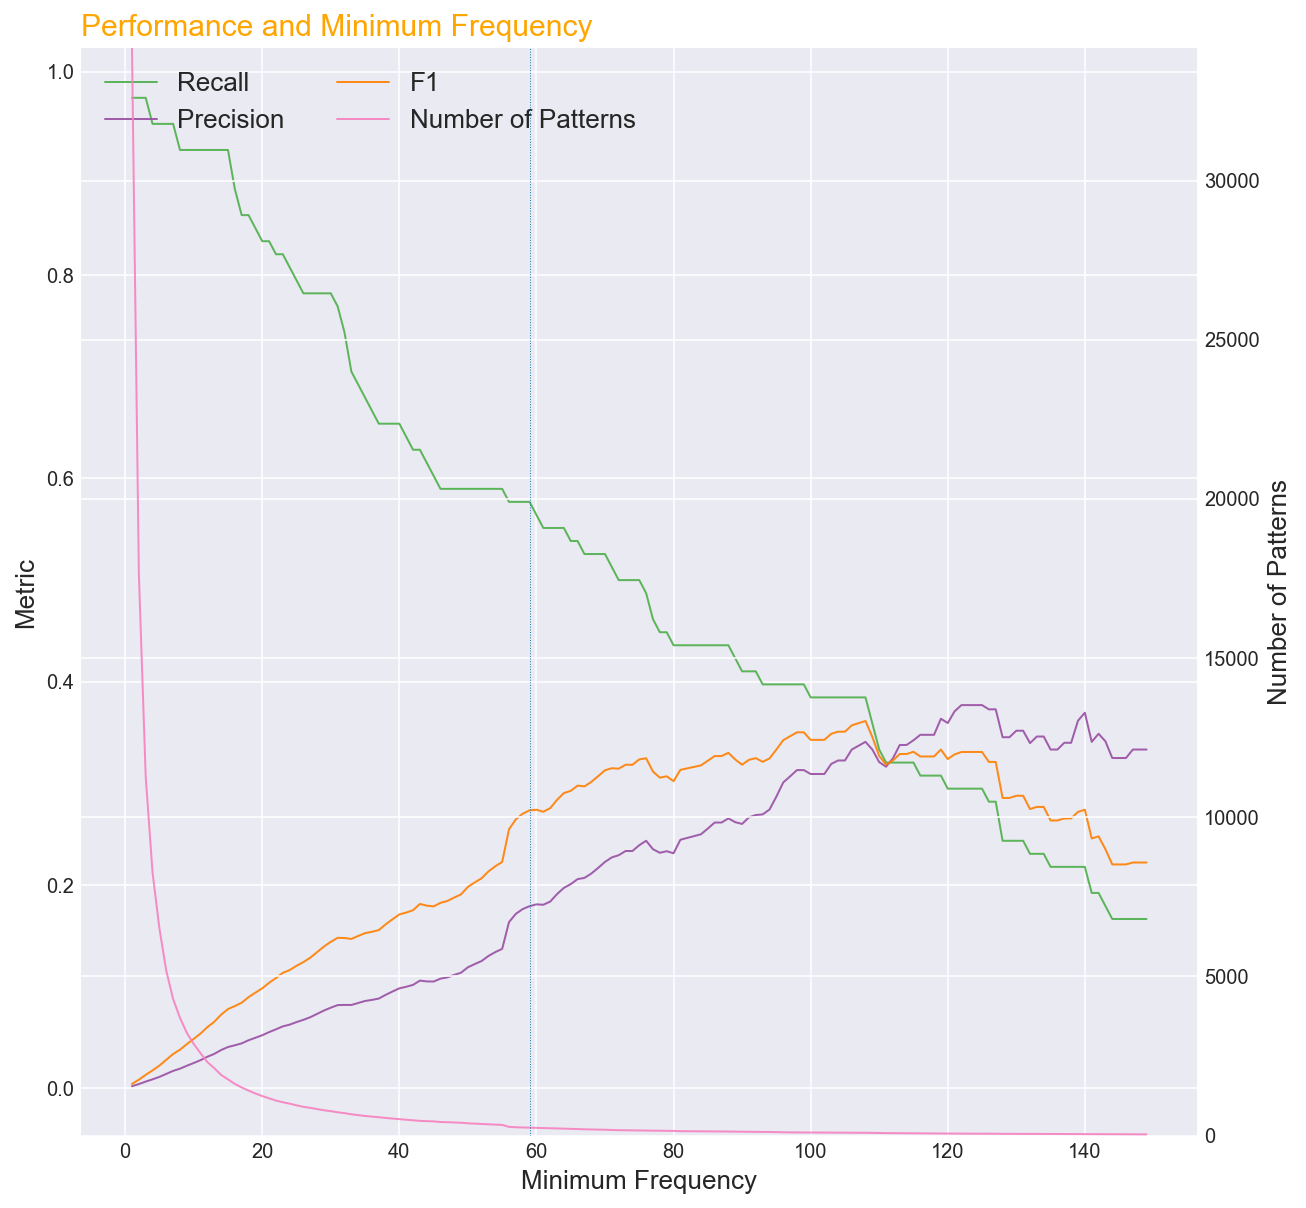

In [289]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

fig, ax1 = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

cols = ['recall', 'precision', 'f1']
for i,col in enumerate(cols, 2):
    ax1.plot(df['min_freq'], df[col], marker='', color=palette(i), linewidth=1, alpha=0.9, label=col.replace('_',' ').capitalize())

ax2 = ax1.twinx()
ax2.plot(df['min_freq'], df['n_patterns'], marker='', color=palette(i+3), linewidth=1, alpha=0.9, label='Number of Patterns')
ax2.set_ylim(0, max(df['n_patterns']))

# Add legend
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc=2, ncol=2, fontsize=13)

plt.axvline(x=59, linewidth=0.5, linestyle=':')

# Add titles
ax1.set_title("Performance and Minimum Frequency", loc='left', fontsize=15, fontweight=0, color='orange')
ax1.set_xlabel("Minimum Frequency", fontsize=13)
ax1.set_ylabel("Metric", fontsize=13)
ax2.set_ylabel("Number of Patterns", fontsize=13)

### Selecting TF IDF Threshold

Using minimum frequency of **59** from previous graph

In [364]:
df = results_df_tfidf[
    (results_df_tfidf['min_freq']==20)].sort_values(by='tfidf_thresh', ascending=True)

Text(0,0.5,'Number of Patterns')

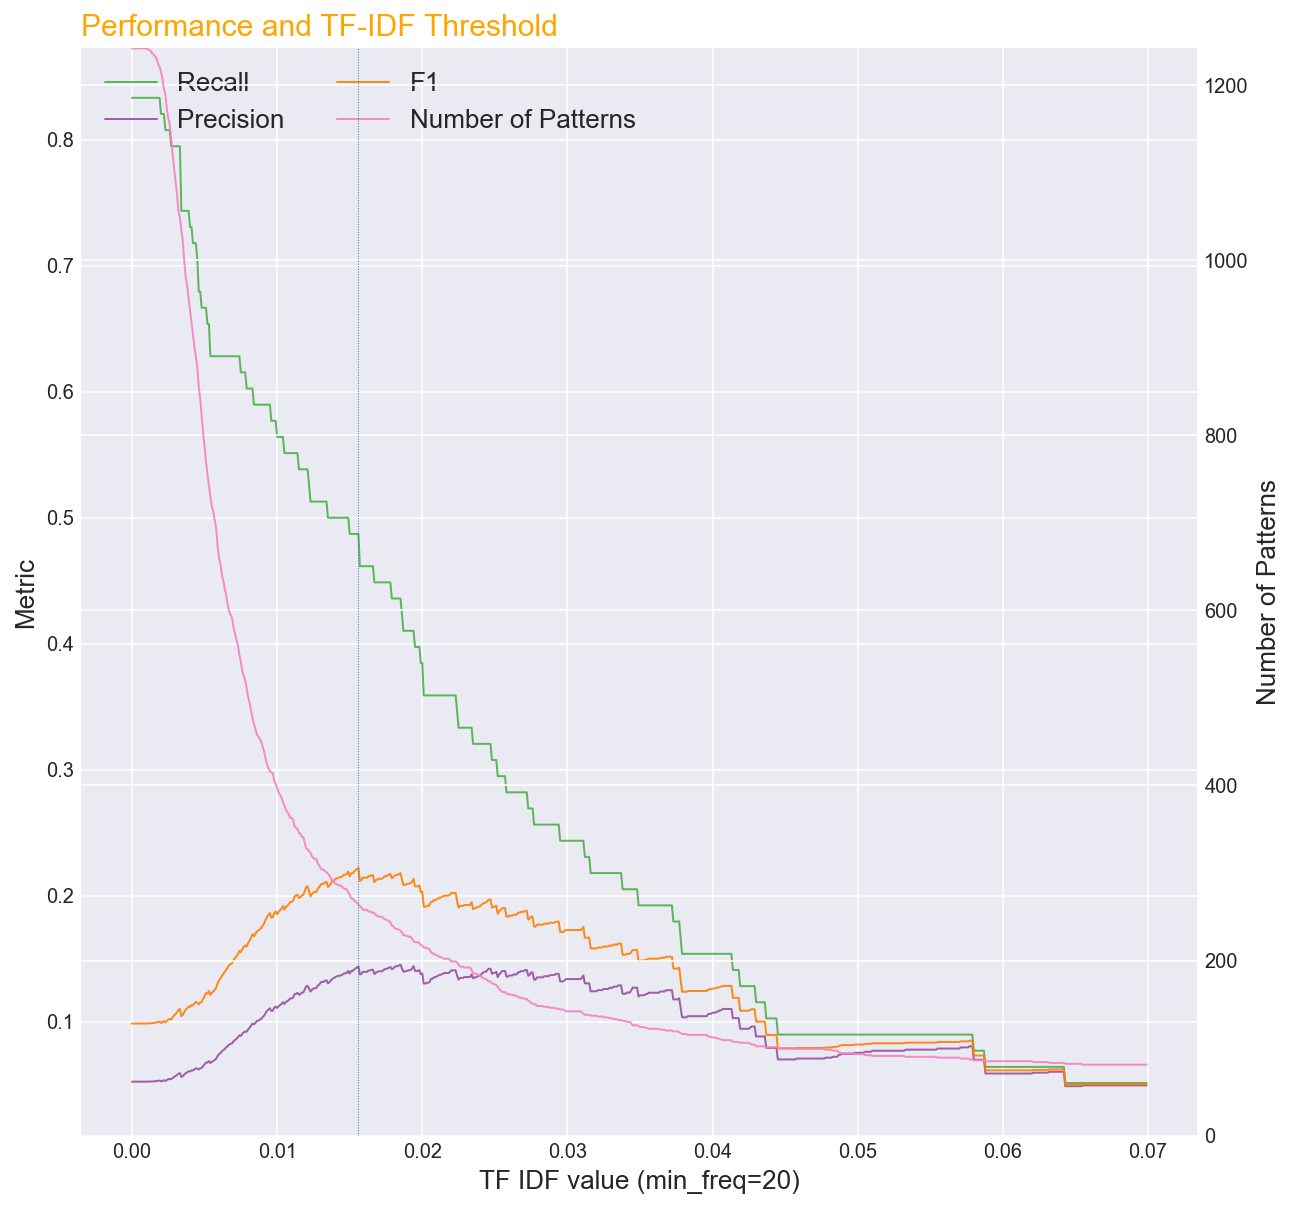

In [372]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')


fig, ax1 = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

cols = ['recall', 'precision', 'f1']
for i,col in enumerate(cols, 2):
    ax1.plot(df['tfidf_thresh'], df[col], marker='', color=palette(i), linewidth=1, alpha=0.9, label=col.replace('_',' ').capitalize())

ax2 = ax1.twinx()
ax2.plot(df['tfidf_thresh'], df['num_patterns'], marker='', color=palette(i+3), linewidth=1, alpha=0.9, label='Number of Patterns')
ax2.set_ylim(0,max(df['num_patterns']))

# Add legend
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc=2, ncol=2, fontsize=13)

plt.axvline(x=0.0156, linewidth=0.5, linestyle=':')

# Add titles
ax1.set_title("Performance and TF-IDF Threshold", loc='left', fontsize=15, fontweight=0, color='orange')
ax1.set_xlabel("TF IDF value (min_freq=20)", fontsize=13)
ax1.set_ylabel("Metric", fontsize=13)
ax2.set_ylabel("Number of Patterns", fontsize=13)

## Final Results

Choosing...

```
min_freq = 59
tfidf_thresh = 0.0156
```

From previous steps

In [ ]:
tabs = [p['tab'] for p in patterns]
set_tabs = set(tabs)

# Get Bag of Patterns 
extracted = get_bop(patterns, min_n=3, max_n=7)

# TF-IDF
distributions = model.get_tfidf_distributions(extracted)

# Average
frame_grouped = average_tfidf(distributions, tabs)

# Get Patterns
our_patterns = reporting.get_all_patterns(
    set_tabs, frame_grouped, tab_num_scores, 
    min_freq=59, exclude_monopattern=True, 
    prefer_superstrings=False, tfidf_thresh=0.0156)

In [ ]:
for t in ['al-istihlāl',
'al-iṣbahān',
'al-mašriquī',
'al-māya',
'al-raṣd',
'al-ḥiŷāz al-kabīr',
'al-ḥiŷāz al-mašriqī',
'al-ṣīka',
'al-‘uššāq',
'garībat al-ḥusayn',
'raml al-māya',
'raṣd al-ḏāyl',
'‘irāq al-‘aŷam']:
    print(t)
    print(' '.join(sorted(our_patterns[t])))
    print("")

In [ ]:
print('Total Number of Patterns: {n}'.format(n=len([x for y in our_patterns.values() for x in y])))
print('')
for t,P in our_patterns.items():
    print('{t}: {num}'.format(t=t, num=len(P)))

In [ ]:
len([y for x in centones_tab.values() for y in x])

##### Exact recall

In [ ]:
results_dict = reporting.get_recalls(our_patterns, centones_tab, set_tabs, print_screen=True, match_superstrings=False)

In [ ]:
results_dict

##### Recall matching superstrings

In [ ]:
results_dict = reporting.get_recalls(our_patterns, centones_tab, set_tabs, print_screen=True, match_superstrings=True)

In [ ]:
for t, P in our_patterns.items():
    print('{t} ({num})'.format(t=t, num=len(P)))
    ours = sorted(P)
    amin = sorted(centones_tab[t])
    p = ["\033[1m" + x + "\033[0;0m" if reporting.is_match(x, amin, superstrings=True) else x for x in ours]
    print('-'*(len(t)+5))
    print('Model: '+', '.join(list(p)))
    print('Amin: '+', '.join(list(amin)))
    recall, precision = results_dict[t]
    print('Recall: {r}'.format(r=recall))
    print('Precision: {p}'.format(p=precision))
    print('')

overall = results_dict['overall']
print('Overall Recall: {r}'.format(r=overall[0]))
print('Overall Precision: {p}'.format(p=overall[1]))

##### Varying Top N

In [ ]:
tabs = [p['tab'] for p in patterns]
set_tabs = set(tabs)

# Get Bag of Patterns
extracted = get_bop(patterns, min_n=3, max_n=7)

# TF-IDF
distributions = model.get_tfidf_distributions(extracted)

# Average
frame_grouped = average_tfidf(distributions, tabs)

# Get Patterns with Confidence Metric
our_patterns = reporting.get_all_patterns(
    set_tabs, frame_grouped, tab_num_scores, 
    min_freq=59, exclude_monopattern=True, 
    prefer_superstrings=False, tfidf_thresh=0.0156, return_confidence=True)

Text(0,0.5,'Score')

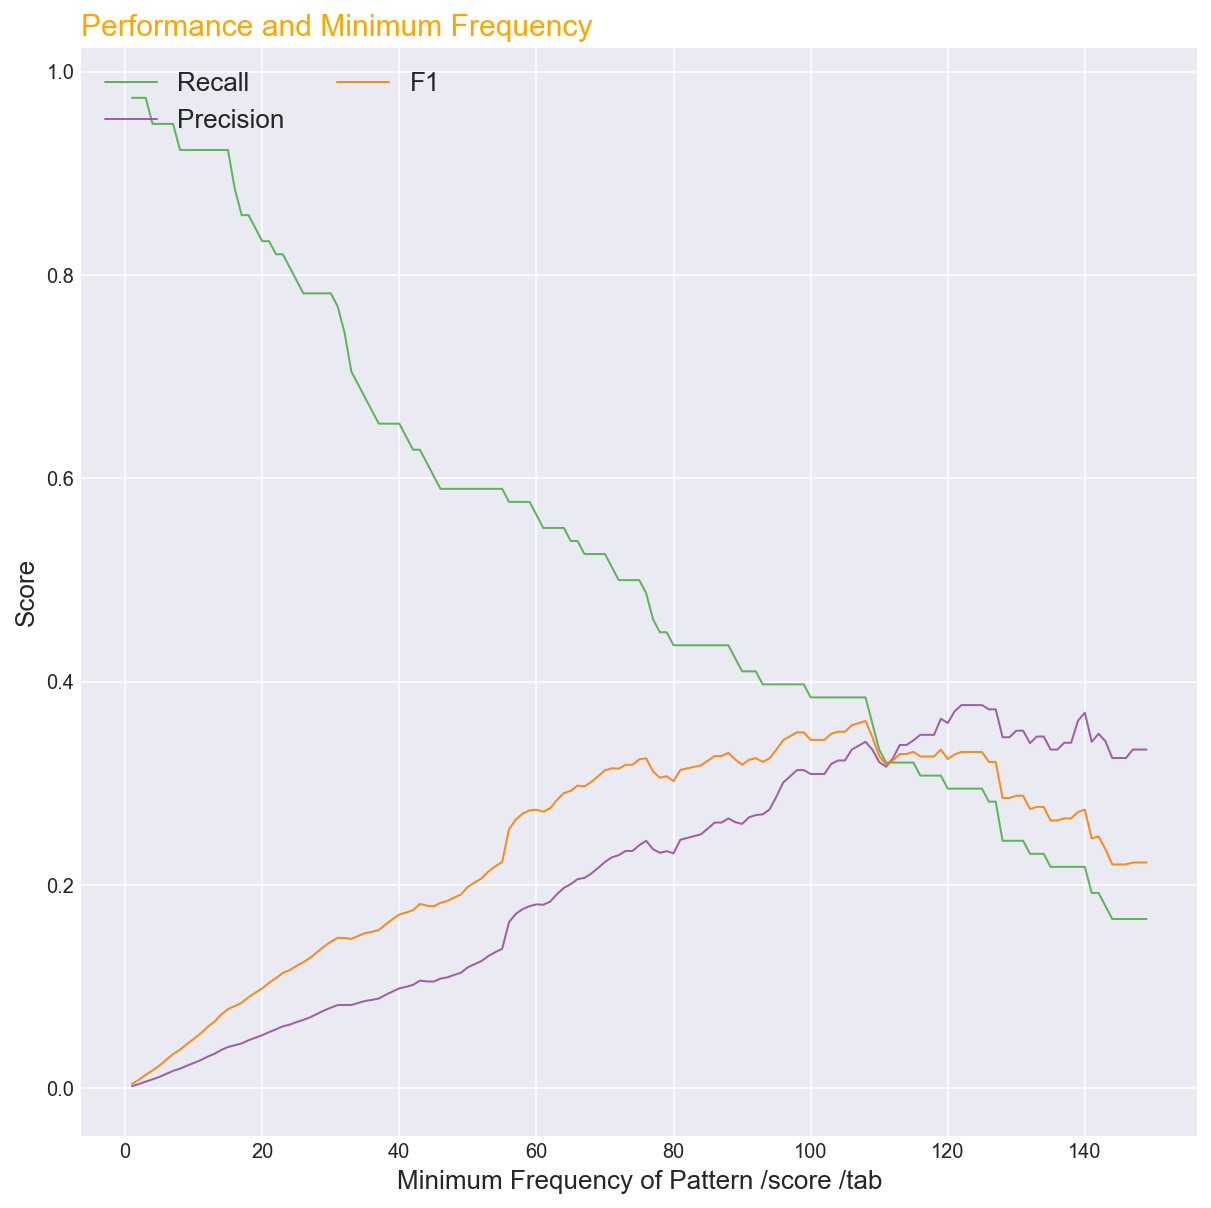

In [65]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

cols = ['recall', 'precision', 'f1']
for i,col in enumerate(cols, 2):
    plt.plot(df['min_freq'], df[col], marker='', color=palette(i), linewidth=1, alpha=0.9, label=col.replace('_',' ').capitalize())

# Add legend
plt.legend(loc=2, ncol=2, fontsize=13)

# Add titles
plt.title("Performance and Minimum Frequency", loc='left', fontsize=15, fontweight=0, color='orange')
plt.xlabel("Minimum Frequency of Pattern /score /tab", fontsize=13)
plt.ylabel("Score", fontsize=13)

In [399]:
flat_ = [[(t,p,i) for p,i in P] for t,P in our_patterns.items()]
flat = sorted([(t,p,i) for T in flat_ for t,p,i in T], key=lambda y: -y[2])

In [436]:
df = pd.DataFrame(columns=['k', 'recall_super', 'precision_super', 'recall', 'precision'])

for k in [5,10,15,20]:
    top_patterns = flat[:k]
    grouped = {}
    for t in set_tabs:
        these_patterns = [x for x in top_patterns if x[0]==t]
        grouped[t] = [x for t,x,y in these_patterns]
    
    results_super = reporting.get_recalls(
        grouped, centones_tab, set_tabs, print_screen=False, match_superstrings=True)
    results = reporting.get_recalls(
        grouped, centones_tab, set_tabs, print_screen=False, match_superstrings=False)
    
    R_, P_ = results_super['overall']
    R, P = results['overall']
    
    df = df.append({
        'k':k, 
        'recall_super':R_,
        'recall':R,
        'precision_super':P_,
        'precision':P
    }, ignore_index=True)

Text(0,0.5,'Metric')

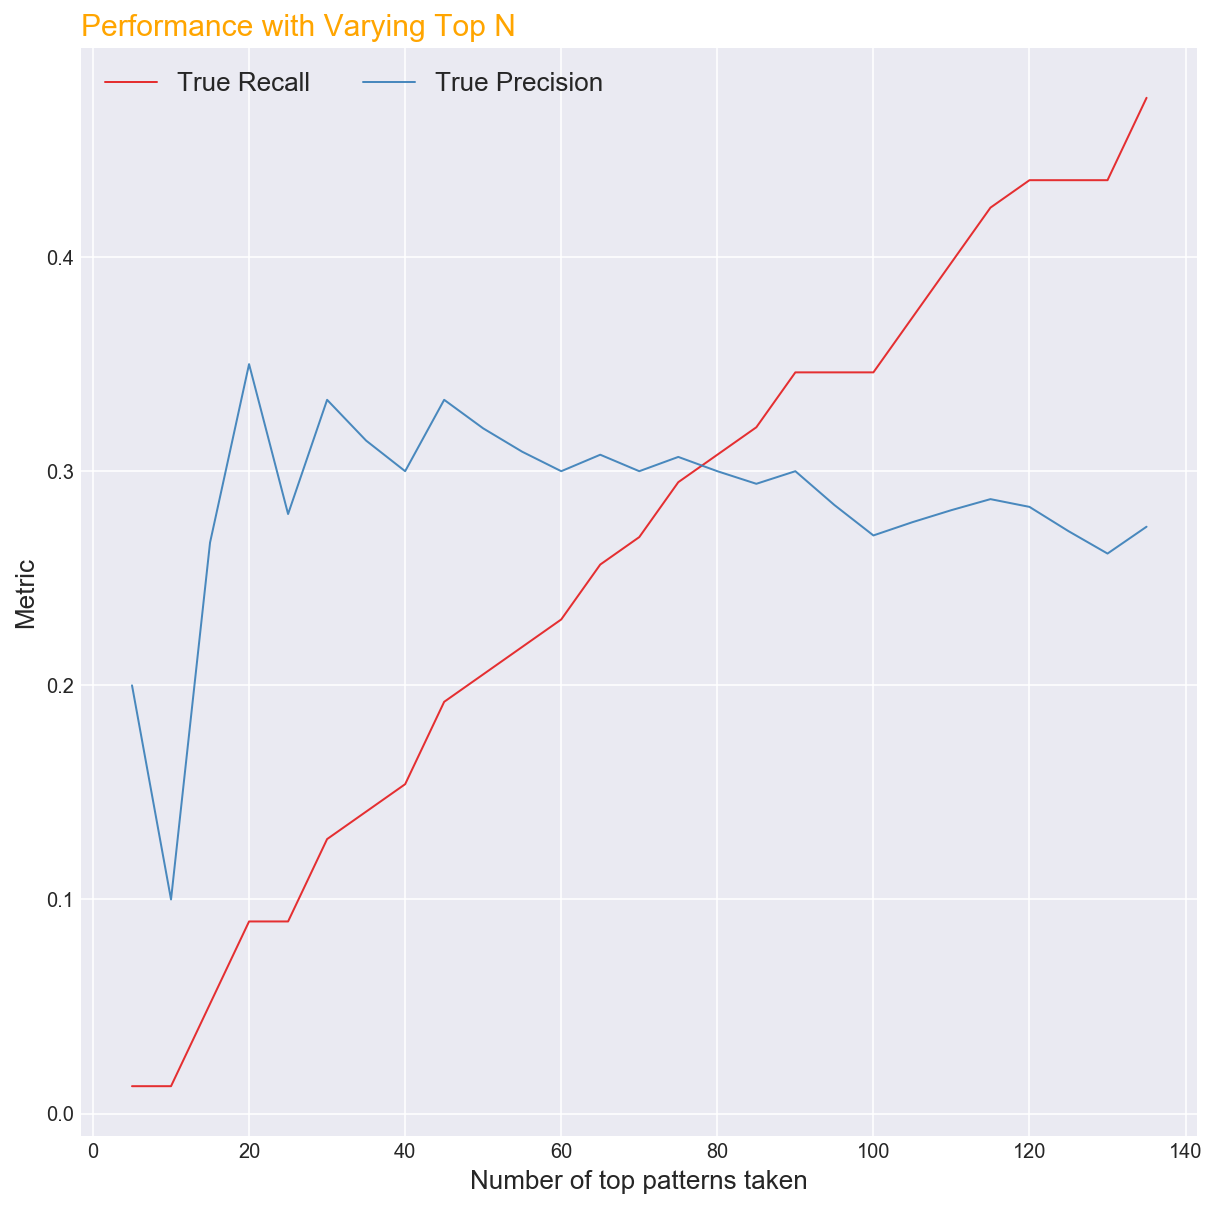

In [445]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')


fig, ax1 = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

ax1.plot(df['k'], df['recall'], marker='', color=palette(0), linewidth=1, alpha=0.9, label='True Recall')
ax1.plot(df['k'], df['precision'], marker='', color=palette(1), linewidth=1, alpha=0.9, label='True Precision')

# Add legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=2, ncol=2, fontsize=13)

# Add titles
ax1.set_title("Performance with Varying Top N", loc='left', fontsize=15, fontweight=0, color='orange')
ax1.set_xlabel("Number of top patterns taken", fontsize=13)
ax1.set_ylabel("Metric", fontsize=13)

Text(0,0.5,'Metric')

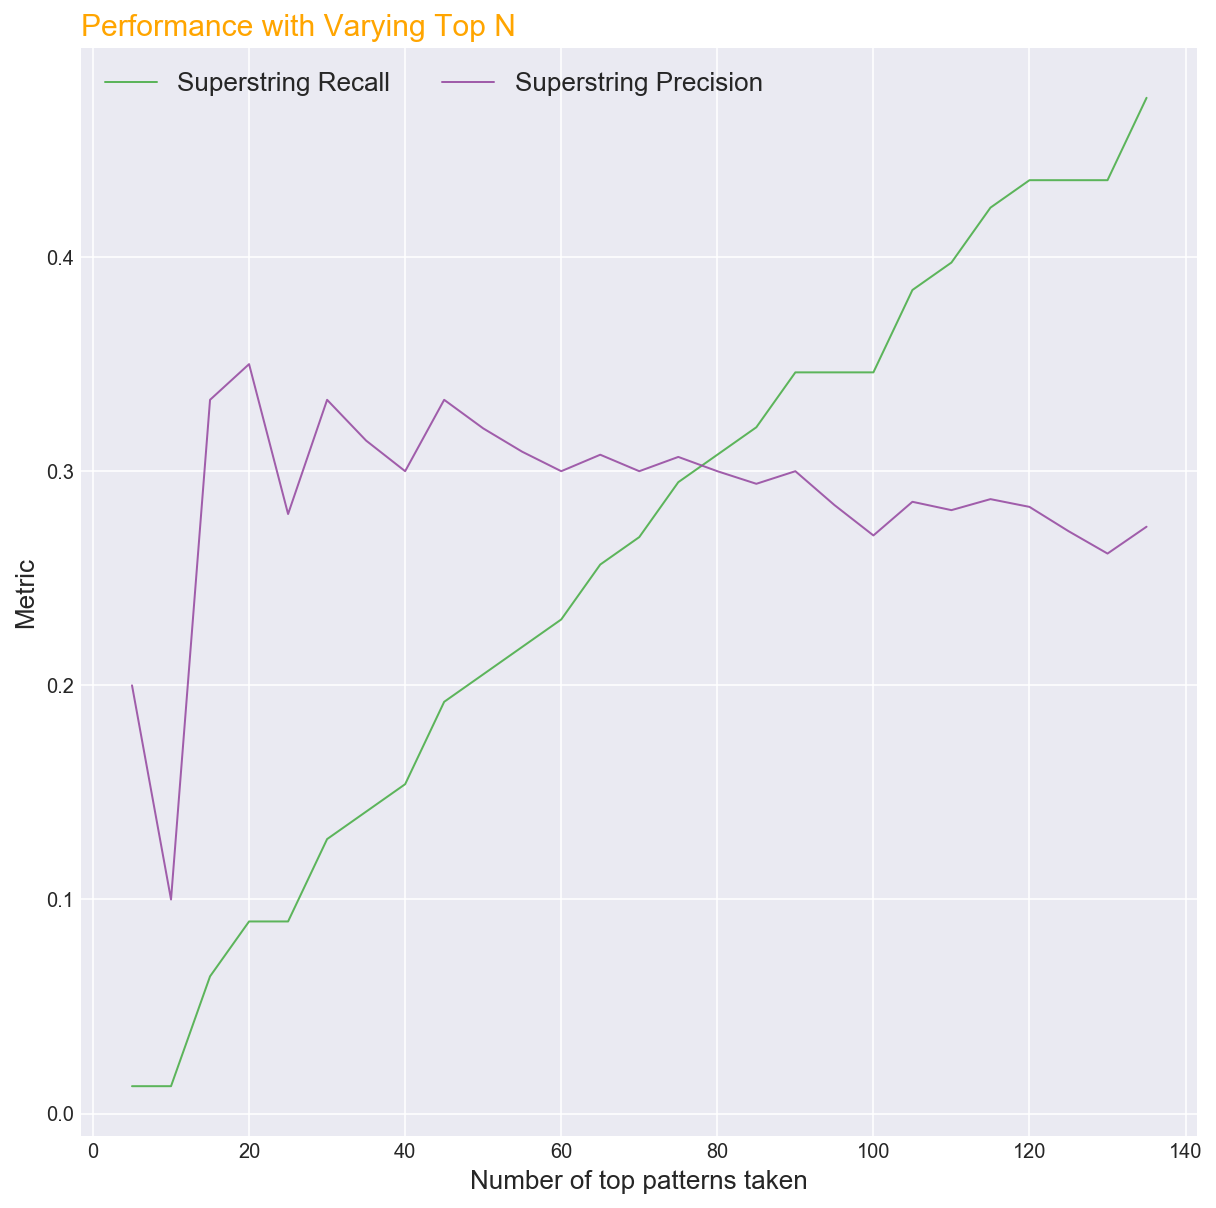

In [444]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')


fig, ax1 = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

ax1.plot(df['k'], df['recall_super'], marker='', color=palette(2), linewidth=1, alpha=0.9, label='Superstring Recall')
ax1.plot(df['k'], df['precision_super'], marker='', color=palette(3), linewidth=1, alpha=0.9, label='Superstring Precision')

# Add legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=2, ncol=2, fontsize=13)


# Add titles
ax1.set_title("Performance with Varying Top N", loc='left', fontsize=15, fontweight=0, color='orange')
ax1.set_xlabel("Number of top patterns taken", fontsize=13)
ax1.set_ylabel("Metric", fontsize=13)